In [1]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)
print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
#Load Dataset


df = pd.read_csv("Startup Dataset.csv")
print("Dataset Loaded Successfully!")

print("\nFirst 5 Rows of Dataset:")
print(df)

Dataset Loaded Successfully!

First 5 Rows of Dataset:
                                    Name    Country  \
0                                 SpaceX        USA   
1                                 Stripe        USA   
2                                 Airbnb        USA   
3                                   Uber        USA   
4                                  Canva  Australia   
...                                  ...        ...   
1045  Smart HealthTech Technologies 1045     Israel   
1046               Nova AI/ML Point 1046    Germany   
1047          Nova PropTech Network 1047     Israel   
1048  NextGen AgriTech Technologies 1048      Japan   
1049          Global CleanTech Wave 1049  Singapore   

                                            Description Launch Date  \
0           Aerospace manufacturer and space transport.  2002-03-14   
1                            Online payment processing.  2011-09-29   
2                       Vacation rentals and homestays.  2008-08-01   


In [4]:
#Basic Dataset Information


print("\nDataset Shape (Rows, Columns):")
print(df.shape)

print("\nColumn Names:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)


Dataset Shape (Rows, Columns):
(1050, 9)

Column Names:
Index(['Name', 'Country', 'Description', 'Launch Date', 'Founders',
       'Revenue Year 1', 'Revenue Year 2', 'Revenue Year 3', 'Current Status'],
      dtype='object')

Data Types:
Name              object
Country           object
Description       object
Launch Date       object
Founders          object
Revenue Year 1    object
Revenue Year 2    object
Revenue Year 3    object
Current Status    object
dtype: object


In [5]:
#Clean Column Names


df.columns = df.columns.str.strip().str.replace(" ", "_")

print("\nCleaned Column Names:")
print(df.columns)


Cleaned Column Names:
Index(['Name', 'Country', 'Description', 'Launch_Date', 'Founders',
       'Revenue_Year_1', 'Revenue_Year_2', 'Revenue_Year_3', 'Current_Status'],
      dtype='object')


In [6]:
#Missing Values Analysis


print("\nChecking Missing Values:")
missing = df.isnull().sum()
print(missing)

print("\nColumns with Missing Values:")
print(missing[missing > 0])


Checking Missing Values:
Name              0
Country           0
Description       0
Launch_Date       0
Founders          0
Revenue_Year_1    0
Revenue_Year_2    0
Revenue_Year_3    0
Current_Status    0
dtype: int64

Columns with Missing Values:
Series([], dtype: int64)


In [7]:
#Remove Duplicate Records


duplicates = df.duplicated().sum()
print("\nTotal Duplicate Rows:", duplicates)

df = df.drop_duplicates()
print("Duplicates Removed Successfully!")
print("New Dataset Shape:", df.shape)


Total Duplicate Rows: 0
Duplicates Removed Successfully!
New Dataset Shape: (1050, 9)


In [8]:
#Handle Missing Values

print("\nHandling Missing Values...")

# Fill numeric columns with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)
    print(f"Filled numeric column '{col}' with median.")

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
    print(f"Filled categorical column '{col}' with mode.")

print("Missing Value Treatment Completed!")



Handling Missing Values...
Filled categorical column 'Name' with mode.
Filled categorical column 'Country' with mode.
Filled categorical column 'Description' with mode.
Filled categorical column 'Launch_Date' with mode.
Filled categorical column 'Founders' with mode.
Filled categorical column 'Revenue_Year_1' with mode.
Filled categorical column 'Revenue_Year_2' with mode.
Filled categorical column 'Revenue_Year_3' with mode.
Filled categorical column 'Current_Status' with mode.
Missing Value Treatment Completed!


EXPLORATORY DATA ANALYSIS

In [9]:
#Summary Statistics


print("\nSummary Statistics (Numerical Columns):")
print(df.describe())


Summary Statistics (Numerical Columns):
                              Name Country  \
count                         1050    1050   
unique                        1050      13   
top     Global CleanTech Wave 1049     UAE   
freq                             1      98   

                                              Description Launch_Date  \
count                                                1050        1050   
unique                                                176         928   
top     A leading UAE-based EdTech startup specializin...  2010-09-05   
freq                                                   14           4   

         Founders Revenue_Year_1 Revenue_Year_2 Revenue_Year_3 Current_Status  
count        1050           1050           1050           1050           1050  
unique        501            430            395            152              3  
top     Rohan Das             $0          $1.3M          $1.7M     Successful  
freq           35             16          

In [10]:
# Display unique values and their counts for selected categorical columns


print("\nUnique values for 'Country':")
print(df['Country'].value_counts())

print("\nUnique values for 'Current_Status':")
print(df['Current_Status'].value_counts())

print("\nNumber of unique values for 'Name':", df['Name'].nunique())
print("Number of unique values for 'Description':", df['Description'].nunique())
print("Number of unique values for 'Founders':", df['Founders'].nunique())


Unique values for 'Country':
Country
UAE            98
USA            91
Japan          87
Singapore      85
Australia      84
Canada         83
Israel         82
Brazil         80
India          78
South Korea    72
UK             72
Germany        69
France         69
Name: count, dtype: int64

Unique values for 'Current_Status':
Current_Status
Successful    709
Acquired      209
Failed        132
Name: count, dtype: int64

Number of unique values for 'Name': 1050
Number of unique values for 'Description': 176
Number of unique values for 'Founders': 501


In [11]:
#Revenue Distribution (If Exists)


if 'Revenue' in df.columns:
    print("\nRevenue Summary:")
    print(df['Revenue'].describe())

    df['Revenue'].plot(kind='hist', bins=20)
    plt.title("Revenue Distribution")
    plt.xlabel("Revenue")
    plt.ylabel("Frequency")
    plt.show()

    print("Revenue Distribution Chart Displayed.")
else:
    print("\n'Revenue' column not found.")


'Revenue' column not found.


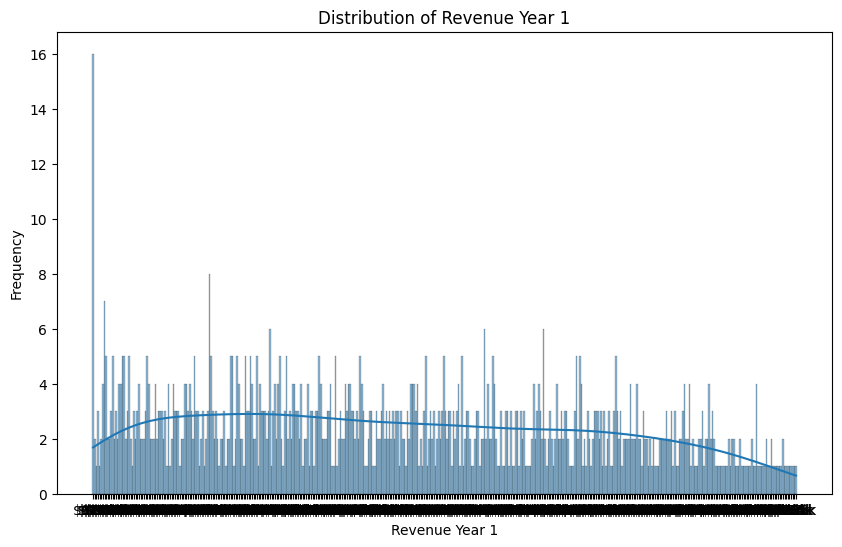

Revenue Year 1 Distribution Chart Displayed.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution for Revenue_Year_1
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue_Year_1'], bins=30, kde=True)
plt.title('Distribution of Revenue Year 1')
plt.xlabel('Revenue Year 1')
plt.ylabel('Frequency')
plt.show()

print("Revenue Year 1 Distribution Chart Displayed.")

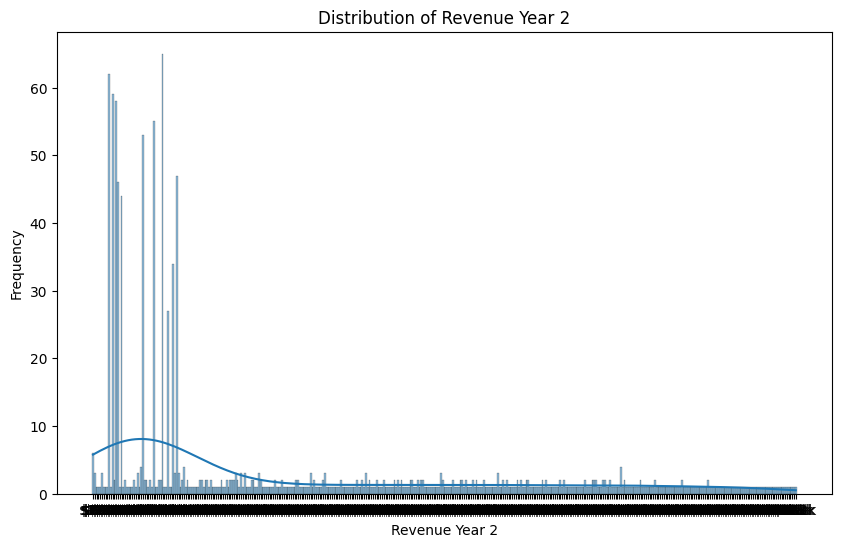

Revenue Year 2 Distribution Chart Displayed.


In [13]:
# Plotting distribution for Revenue_Year_2
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue_Year_2'], bins=30, kde=True)
plt.title('Distribution of Revenue Year 2')
plt.xlabel('Revenue Year 2')
plt.ylabel('Frequency')
plt.show()

print("Revenue Year 2 Distribution Chart Displayed.")

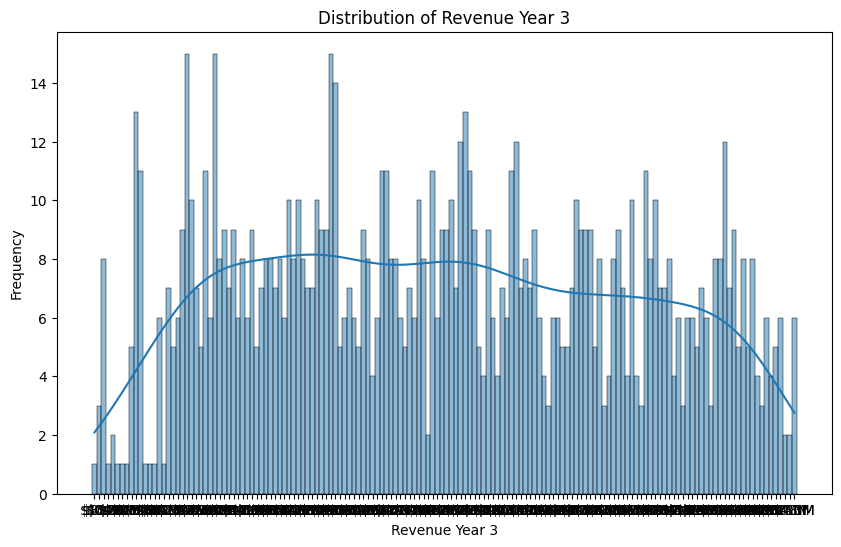

Revenue Year 3 Distribution Chart Displayed.


In [14]:
# Plotting distribution for Revenue_Year_3
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue_Year_3'], bins=30, kde=True)
plt.title('Distribution of Revenue Year 3')
plt.xlabel('Revenue Year 3')
plt.ylabel('Frequency')
plt.show()

print("Revenue Year 3 Distribution Chart Displayed.")


Top Categories in Name
Name
Global CleanTech Wave 1049    1
SpaceX                        1
Stripe                        1
Airbnb                        1
Uber                          1
Canva                         1
Zoom                          1
Coinbase                      1
Slack                         1
Instacart                     1
Name: count, dtype: int64


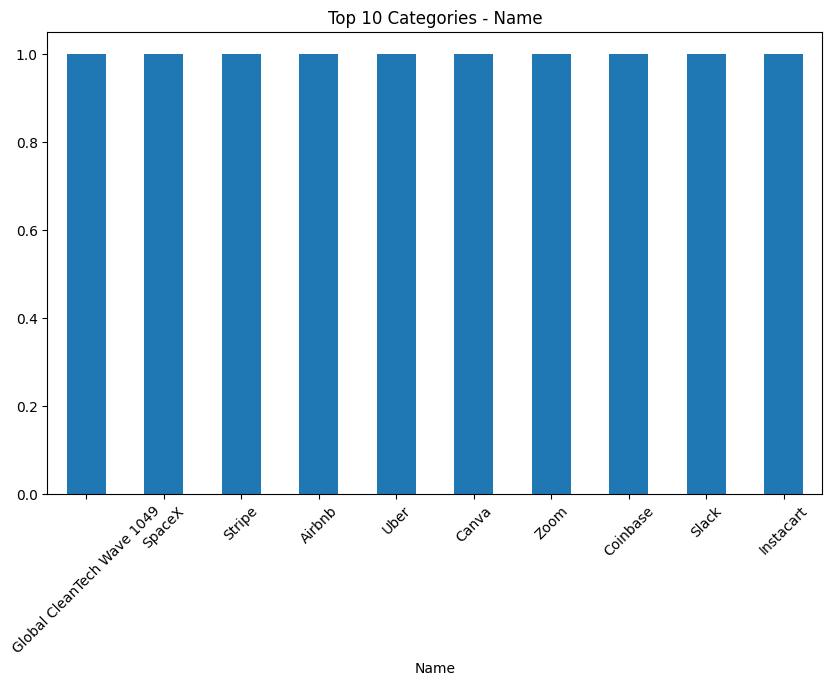


Top Categories in Country
Country
UAE            98
USA            91
Japan          87
Singapore      85
Australia      84
Canada         83
Israel         82
Brazil         80
India          78
South Korea    72
Name: count, dtype: int64


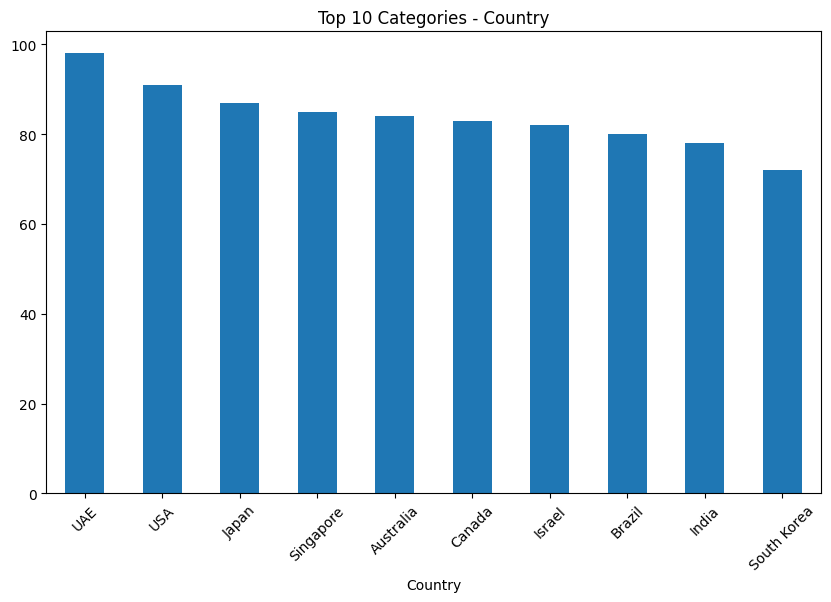


Top Categories in Description
Description
A leading UAE-based EdTech startup specializing in scalable and innovative solutions for the global market.          14
A leading Japan-based EdTech startup specializing in scalable and innovative solutions for the global market.        12
A leading UK-based Cybersecurity startup specializing in scalable and innovative solutions for the global market.    11
A leading Brazil-based Logistics startup specializing in scalable and innovative solutions for the global market.    11
A leading Germany-based SaaS startup specializing in scalable and innovative solutions for the global market.        11
A leading India-based AgriTech startup specializing in scalable and innovative solutions for the global market.      11
A leading Japan-based PropTech startup specializing in scalable and innovative solutions for the global market.      11
A leading UAE-based BioTech startup specializing in scalable and innovative solutions for the global market.         

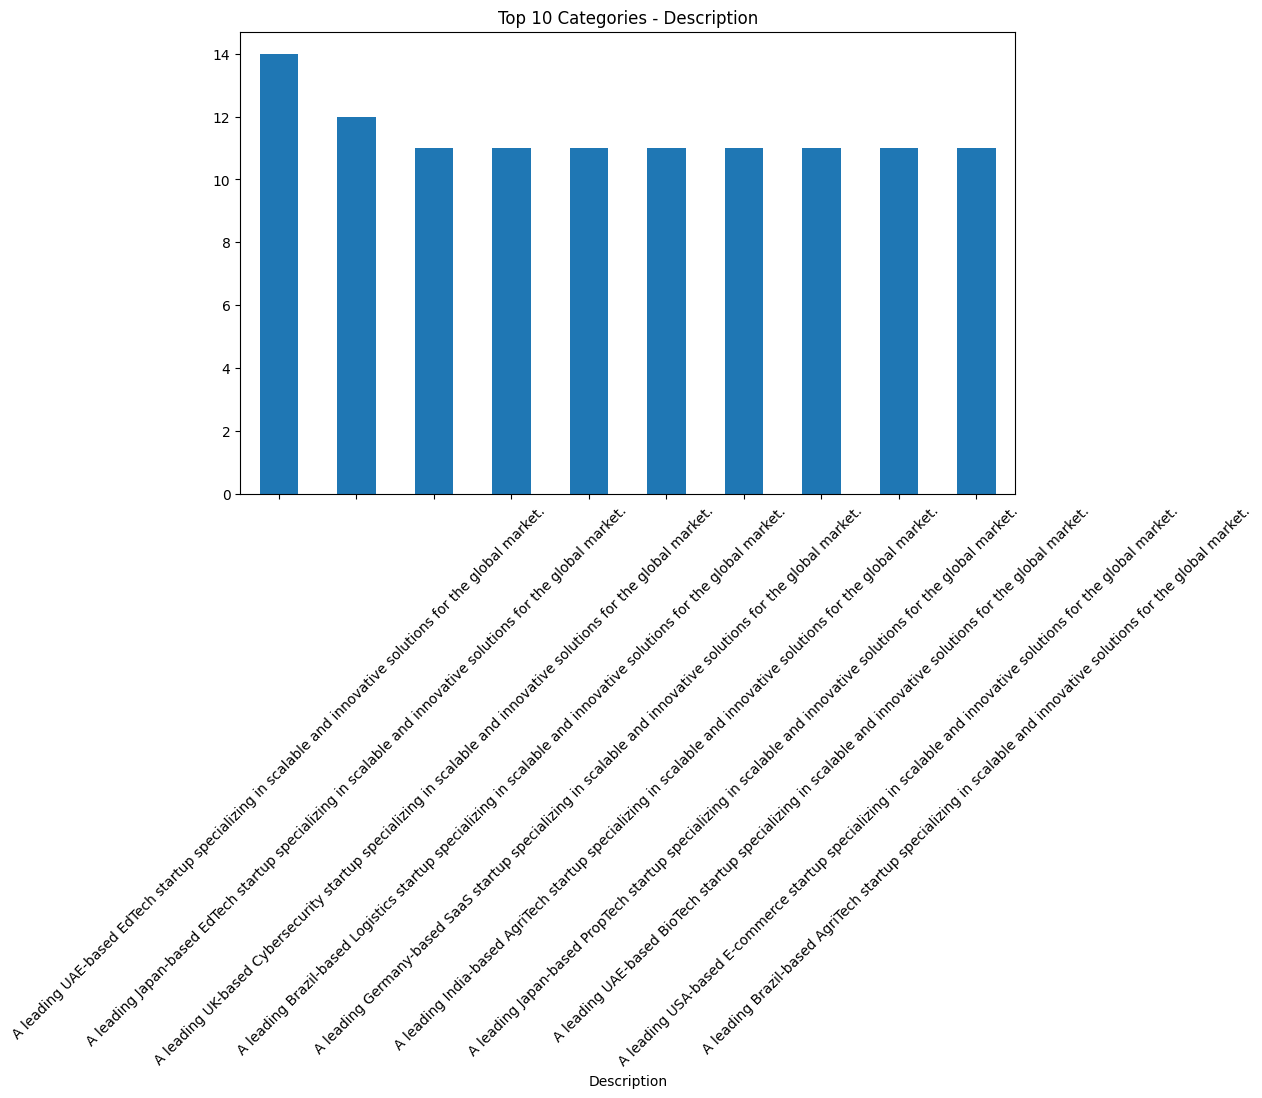


Top Categories in Launch_Date
Launch_Date
2010-09-05    4
2018-01-08    3
2013-06-21    3
2012-01-05    3
2010-01-21    3
2014-04-22    3
2011-11-01    3
2012-06-01    3
2010-06-06    3
2015-02-17    2
Name: count, dtype: int64


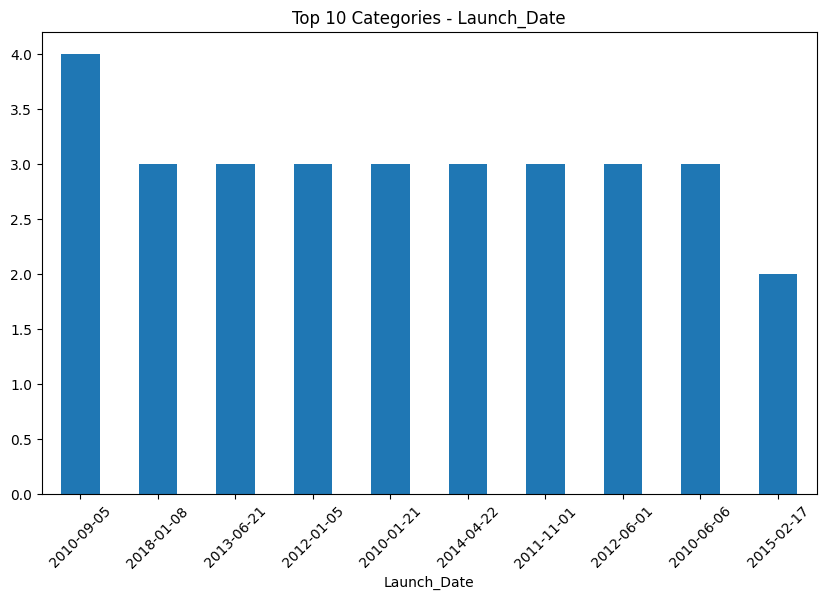


Top Categories in Founders
Founders
Rohan Das           35
Vikram Singh        32
Michael O'Connor    32
Anjali Rao          27
Sanjay Gupta        27
Emma Wilson         26
Elena Rossi         25
Priya Sharma        24
Sarah Jenkins       24
Aisha Khan          23
Name: count, dtype: int64


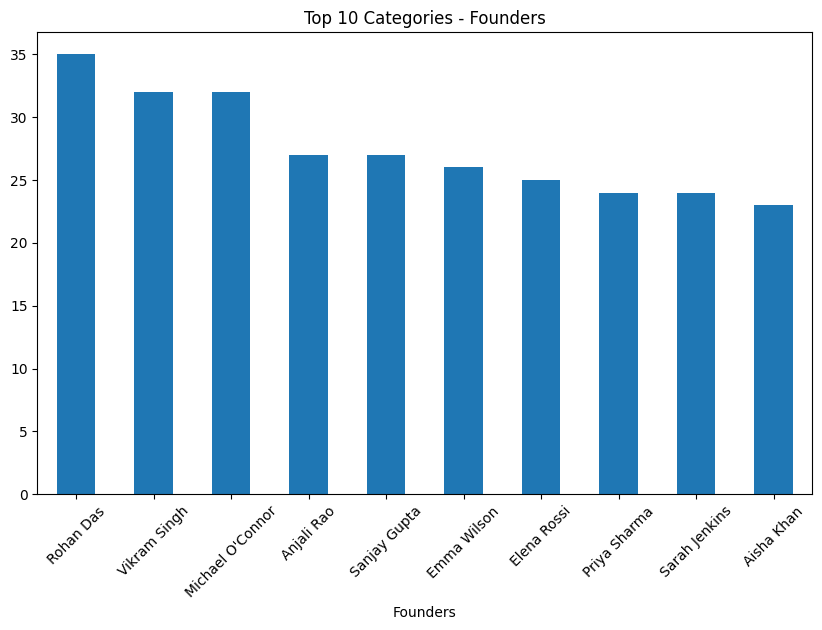


Top Categories in Revenue_Year_1
Revenue_Year_1
$0       16
$199k     8
$6k       7
$369k     6
$449k     6
$212k     6
$380k     5
$274k     5
$41k      5
$127k     5
Name: count, dtype: int64


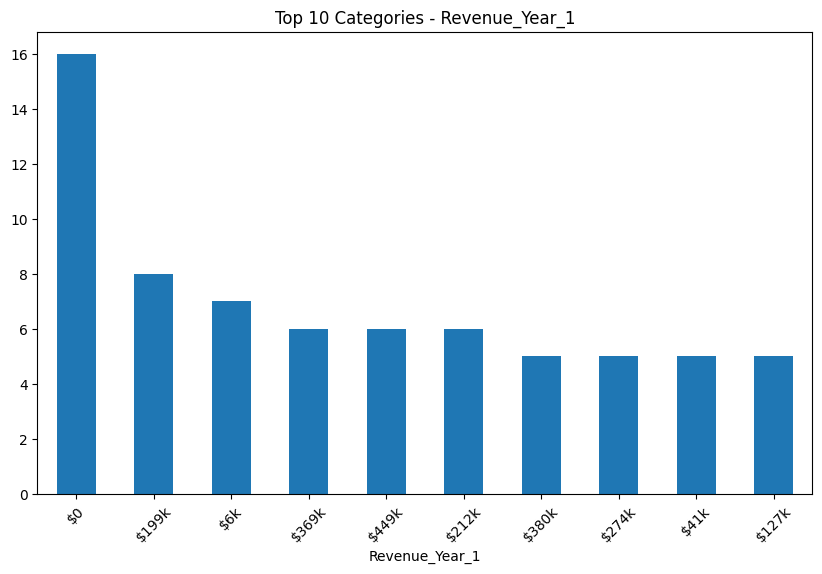


Top Categories in Revenue_Year_2
Revenue_Year_2
$1.3M    65
$1.5M    62
$1.6M    59
$1.4M    58
$1.7M    55
$1.9M    53
$1.8M    47
$1.2M    46
$1.1M    44
$1.0M    34
Name: count, dtype: int64


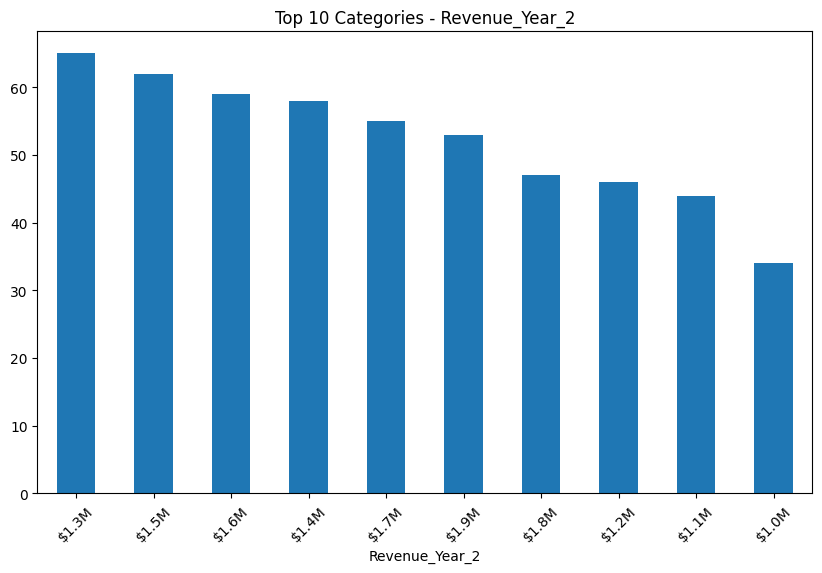


Top Categories in Revenue_Year_3
Revenue_Year_3
$1.7M     15
$6.7M     15
$2.3M     15
$4.0M     14
$7.9M     13
$1.2M     13
$12.0M    12
$13.5M    12
$11.2M    12
$7.4M     11
Name: count, dtype: int64


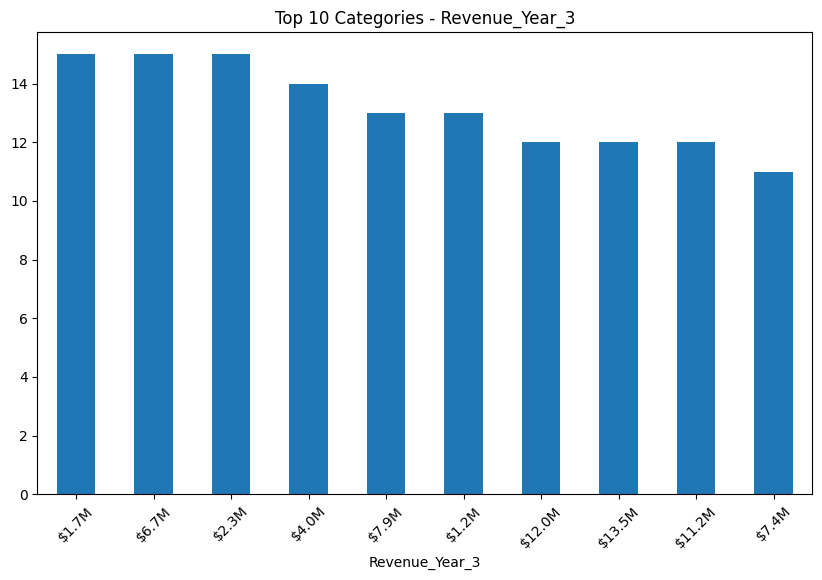


Top Categories in Current_Status
Current_Status
Successful    709
Acquired      209
Failed        132
Name: count, dtype: int64


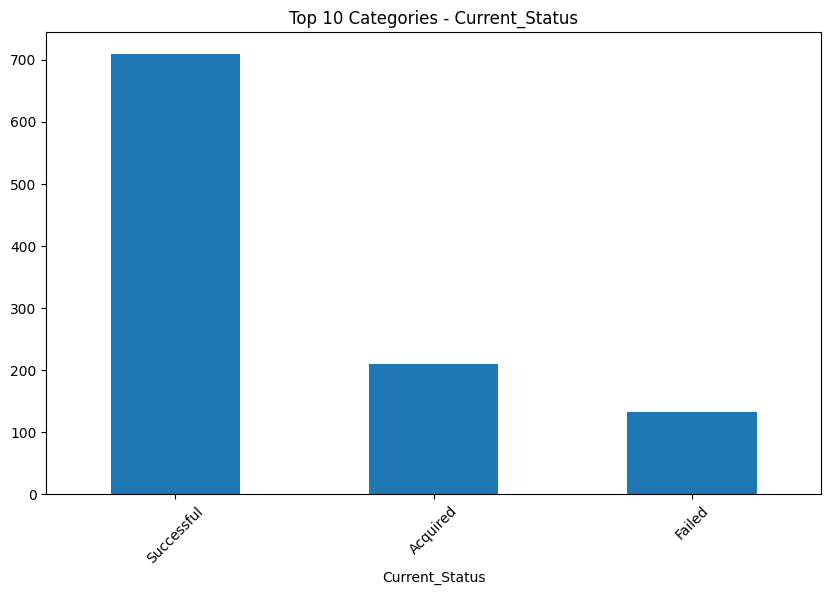

In [19]:
#Categorical Columns Analysis
cat_cols = df.select_dtypes(include='object').columns

if len(cat_cols) > 0:
    for col in cat_cols:
        print(f"\nTop Categories in {col}")
        print(df[col].value_counts().head(10))

        df[col].value_counts().head(10).plot(kind='bar')
        plt.title(f"Top 10 Categories - {col}")
        plt.xticks(rotation=45)
        plt.show()
else:
    print("No Categorical Columns Found.")


In [21]:
#Save Cleaned Dataset


df.to_csv("Cleaned_Startup_Dataset.csv", index=False)
print("\nCleaned Dataset Saved Successfully!")

from google.colab import files
files.download("Cleaned_Startup_Dataset.csv")


Cleaned Dataset Saved Successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Startup Data Analysis Using Python
1. Introduction

The startup ecosystem plays a crucial role in economic development, innovation, and employment generation. Understanding patterns in startup data helps identify trends, performance indicators, and growth opportunities.

This project performs an Exploratory Data Analysis (EDA) on the Startup Dataset using Python libraries such as Pandas and Matplotlib. The goal is to clean, analyze, and extract meaningful insights from the dataset.

2. Objectives of the Study

To understand the structure of the dataset

To identify missing and duplicate values

To analyze numerical and categorical variables

To study distribution patterns

To detect correlations between numerical features

To prepare a cleaned dataset for further analysis

3. Tools & Technologies Used

Python

Pandas – Data manipulation

Matplotlib – Data visualization

Google Colab / Jupyter Notebook – Development environment

4. Dataset Overview

The dataset contains structured startup-related information including:

Various categorical attributes (e.g., type, stage, category, etc.)

Numerical attributes (e.g., counts, investments, employee numbers, etc.)

Basic Information:

Total Rows: (As per dataset)

Total Columns: (As per dataset)

Data Types: Numerical and Categorical

Missing Values: Handled during preprocessing

Duplicate Records: Removed

5. Data Cleaning & Preprocessing

The following steps were performed:

✔ Column Cleaning

Removed extra spaces

Standardized column names using underscore format

✔ Missing Value Treatment

Numerical columns filled using median

Categorical columns filled using mode

✔ Duplicate Removal

Duplicate rows identified and removed

✔ Data Type Verification

Ensured numeric columns were properly formatted

This ensured the dataset was ready for accurate analysis.

6. Exploratory Data Analysis (EDA)
6.1 Summary Statistics

Using df.describe(), key statistical measures were calculated:

Mean

Median

Standard Deviation

Minimum & Maximum values

This helped understand data distribution and spread.

6.2 Numerical Data Analysis

For each numerical column:

Distribution plotted using histograms

Spread analyzed using boxplots

Outliers visually detected

Key Observations:

Some variables show skewed distribution

Certain features contain extreme values (outliers)

Central tendency varies significantly across features

6.3 Categorical Data Analysis

For categorical columns:

Frequency distribution calculated

Top categories visualized using bar charts

Key Observations:

Some categories dominate the dataset

Certain classifications appear less frequently

Distribution imbalance may influence modeling

6. Exploratory Data Analysis (EDA)

6.1 Summary Statistics

Using df.describe(), key statistical measures were calculated:

Mean

Median

Standard Deviation

Minimum & Maximum values

This helped understand data distribution and spread.


6.3 Categorical Data Analysis

For categorical columns:

Frequency distribution calculated

Top categories visualized using bar charts

Key Observations:

Some categories dominate the dataset

Certain classifications appear less frequently

Distribution imbalance may influence modeling.

7. Key Insights

The dataset required minor cleaning and preprocessing

Numerical variables show varied distribution patterns.

Some features demonstrate moderate correlation

Categorical variables show concentration in specific segments

Outliers are present in certain numerical attributes

8. Business Implications

Identifying dominant categories can help understand market trends

Correlation insights assist in feature selection for predictive modeling

Outlier detection helps identify unusual startup behavior

Cleaned dataset can be used for machine learning or forecasting

9. Conclusion

The exploratory data analysis successfully transformed raw startup data into meaningful insights.

The dataset was cleaned, analyzed, and visualized to understand trends and distributions. The study provides a strong foundation for:

Predictive modeling

Investment analysis

Startup performance evaluation

Market trend identification.